In [43]:
from utils.data import *
from time import time
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Convolution2D, MaxPooling2D, DepthwiseConv2D, AveragePooling2D

In [2]:
t1 = time()
data, labels, label_to_breed, breed_to_label = load_data(width = 224, height = 224)
print('Time to load the data: %ss' % int(time()-t1))

./data/dog_images.tar already exists. Begin extracting...
Standford dogs data were extracted. Begin creating dataset...
Dataset, labels and dictionaies are loaded
Time to load the data: 99s


(224, 224, 4)


Text(0.5, 1.0, 'Shetland_sheepdog')

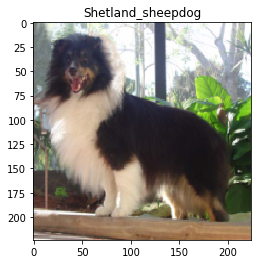

In [3]:
#one image has a depth of 4
errors, name_errors = [d for d in data if d.shape[2] != 3], [label_to_breed[labels[i]] 
                                                             for i in range(len(data)) if data[i].shape[2] != 3]
print(errors[0].shape)
plt.imshow(errors[0])
plt.title(name_errors[0])

In [4]:
#remove this image and the corresponding dataset
x = [d for d in data if d.shape[2]==3]
y = [labels[i] for i in range(len(data)) if data[i].shape[2]==3]

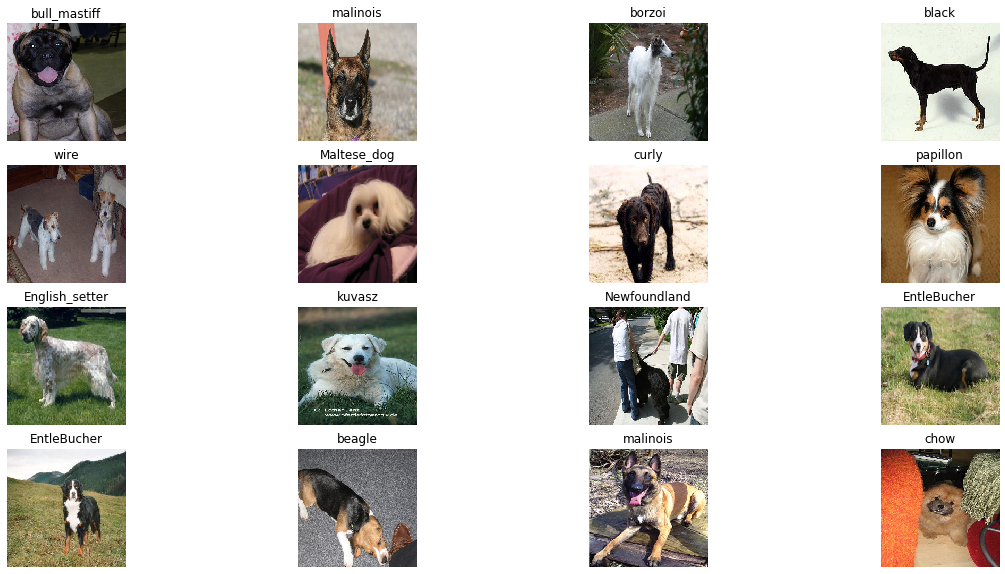

In [5]:
# Visualization of the original data
fig = plt.figure(figsize=(20,10))
mask=np.random.choice(len(x),16, replace = False)
for i in range(16):
    ax = fig.add_subplot(4,4,i+1)
    ax.imshow(x[mask[i]])
    ax.axis('off')
    ax.title.set_text(label_to_breed[labels[mask[i]]])

In [6]:
x = np.asarray(x)
y = np.asarray(y)
x.shape, y.shape

((20579, 224, 224, 3), (20579,))

In [7]:
shuffle = np.random.choice(x.shape[0], x.shape[0], replace = False)
shuffle

array([17589, 20415, 12580, ..., 19739,  6788, 15356])

In [8]:
x = x[shuffle,:,:,:]
y = to_categorical(y[shuffle,])
x.shape, y.shape

((20579, 224, 224, 3), (20579, 120))

In [9]:
num_train = int(0.95*x.shape[0])
num_test = x.shape[0]-num_train
x_train = x[:num_train,:,:,:]
y_train = y[:num_train,]
x_test = x[num_train:,:,:,:]
y_test = y[num_train:,:]

x_train = x_train/255
x_test = x_test/255

In [44]:
np.random.seed(123)  # for reproducibility 

model = Sequential()

model.add(Convolution2D(32, (3, 3), strides=2, padding='same', activation='relu', input_shape=x_train.shape[1:]))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(64, (1, 1), padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(128, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(256, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(256, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(512, (1, 1), strides=1, activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(2,2), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(1024, (1, 1), strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(kernel_size = (3, 3), padding='same', depth_multiplier=1, strides=(1,1), activation='relu'))
model.add(BatchNormalization())
model.add(Convolution2D(1024, (1, 1), padding='same', strides=1, activation='relu'))
model.add(BatchNormalization())

model.add(AveragePooling2D(pool_size=(7,7), strides=1))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(120, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_221 (Conv2D)          (None, 112, 112, 32)      896       
_________________________________________________________________
batch_normalization_441 (Bat (None, 112, 112, 32)      128       
_________________________________________________________________
depthwise_conv2d_208 (Depthw (None, 112, 112, 32)      320       
_________________________________________________________________
batch_normalization_442 (Bat (None, 112, 112, 32)      128       
_________________________________________________________________
conv2d_222 (Conv2D)          (None, 112, 112, 64)      2112      
_________________________________________________________________
batch_normalization_443 (Bat (None, 112, 112, 64)      256       
_________________________________________________________________
depthwise_conv2d_209 (Depthw (None, 56, 56, 64)      

In [46]:
# 8. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [47]:
# 9. Fit model on training data
model.fit(x_train, y_train, 
          batch_size=32, epochs=1, verbose=1)

Epoch 1/1
  128/19550 [..............................] - ETA: 1:27:58 - loss: 6.1836 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [10]:
# 10. Evaluate model on test data
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/1
19550/19550 [==============================] - 2027s 104ms/step - loss: 4.7486 - accuracy: 0.0182


In [11]:
score

[4.560169435451051, 0.03498542308807373]